In [567]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Data input and cleaning

In [568]:
sns.set()
data = pd.read_csv("data.csv", dtype={'time':np.float64})

data['error'] = [float(x[1:-1]) for x in data['fbest']]
data['time_minutes'] = data['time'] / 60

data = data.join(data['freq'].str.split(', ', expand=True).apply(pd.to_numeric))

data.drop(["fbest", "freq", "time", "Unnamed: 0", "errorLimit"], axis=1, inplace=True)
    
data.rename(columns=lambda x: x+1 if type(x)==int else x, inplace=True)

data.head()

f1  grad                                                sol     error  \
0  200   600  [15.208292249700605, 12.897337509198916, 8.282...  6.725889   
1  200   600  [12.053141972032, 5.976844618507734, 13.045133...  7.036257   
2  200   600  [13.182231240147294, 12.59640312635066, 12.285...  2.767868   
3  200   600  [17.209074361164554, 7.580185981661549, 8.2768...  7.006342   
4  200   600  [13.487814343040249, 15.58163418754577, 13.522...  4.949436   

   time_minutes           1           2            3            4  \
0     60.244107  204.964195  698.722284  1475.530533  2139.717316   
1     60.185102  186.486812  748.183985  1392.995582  2187.021731   
2     60.421157  199.841388  752.930228  1463.671789  2036.961313   
3     60.016675  214.249688  698.401922  1398.926140  2085.212812   
4     60.468657  192.925597  850.727462  1231.792738  2049.101813   

             5            6  
0  2639.983788  2838.567117  
1  2917.874866  3421.089460  
2  2527.024678  3246.125718  
3  2180.448278  3255.663650  
4  2518.503645  3130.192563

In [569]:
data.describe()

f1   grad      error  time_minutes           1           2  \
count   40.0   40.0  40.000000     40.000000   40.000000   40.000000   
mean   200.0  600.0   5.341870     60.344201  195.993110  764.507649   
std      0.0    0.0   1.204181      0.212715   37.148043  164.516216   
min    200.0  600.0   2.767868     60.012270   45.946869   83.048156   
25%    200.0  600.0   4.481787     60.179174  195.983226  760.313481   
50%    200.0  600.0   5.406354     60.334826  201.672268  793.430524   
75%    200.0  600.0   6.119246     60.530282  209.322934  840.464403   
max    200.0  600.0   7.816854     60.665244  246.848393  898.939890   

                 3            4            5            6  
count    40.000000    40.000000    40.000000    40.000000  
mean   1312.743395  1860.377844  2430.330163  2926.111020  
std     306.567925   447.988953   594.450547   752.379366  
min     112.102906   126.681366   126.874024   149.030525  
25%    1291.467583  1861.347448  2510.267903  2939.253569  
50%    1394.882983  2001.073315  2579.316396  3160.455698  
75%    1442.040420  2068.095943  2664.165044  3264.292880  
max    1699.511749  2396.107136  2969.329679  3777.955526

In [570]:
dataS = data.drop(["f1", "grad", "error", "time_minutes", 1, 2, 3, 4, 5, 6], axis=1)

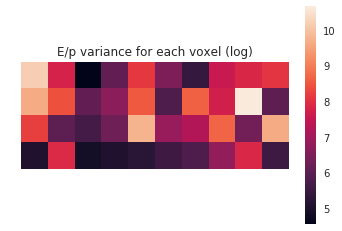

In [571]:
dataS['E'] = [x[1:-1] for x in dataS['sol']]
dataS = dataS.join(dataS['E'].str.split(', ', expand=True).apply(pd.to_numeric))
dataS.rename(columns=lambda x: x+1 if type(x)==int else x, inplace=True)
dataS.drop(['E', 'sol'], axis=1, inplace=True)

def invlog(x):
    return 10**x

def invlogp(x):
    return 10**(x-6)


data_E = dataS[list(range(1, 41))]
data_E = data_E.apply(invlog)
data_E.clip(lower=1e6, inplace=True)

data_p = dataS[list(range(41, 81))]
data_p = data_p.apply(invlogp)
data_p.clip(lower=1e1, inplace=True)

data_Ep = pd.DataFrame()
for i in range(1, 41):
    data_Ep[i] = data_E[i] / data_p[40+i]

data_E = data_E.apply(np.log10)
data_p = data_p.apply(np.log10)
data_Ep = data_Ep.apply(np.log10)
    
sols_E = data_E.values.T.tolist()
sols_p = data_p.values.T.tolist()
sols_Ep = data_Ep.values.T.tolist()

sols_Ep_var = data_Ep.var(axis=0)

plt.imshow([sols_Ep_var[x:40:4] for x in range(4)])
plt.axis("off")
plt.title("E/p variance for each voxel (log)")
plt.colorbar()
plt.show()

### Log_10(E/p) for each solution

Shared clusters E/p =
 [[8.62026098]]


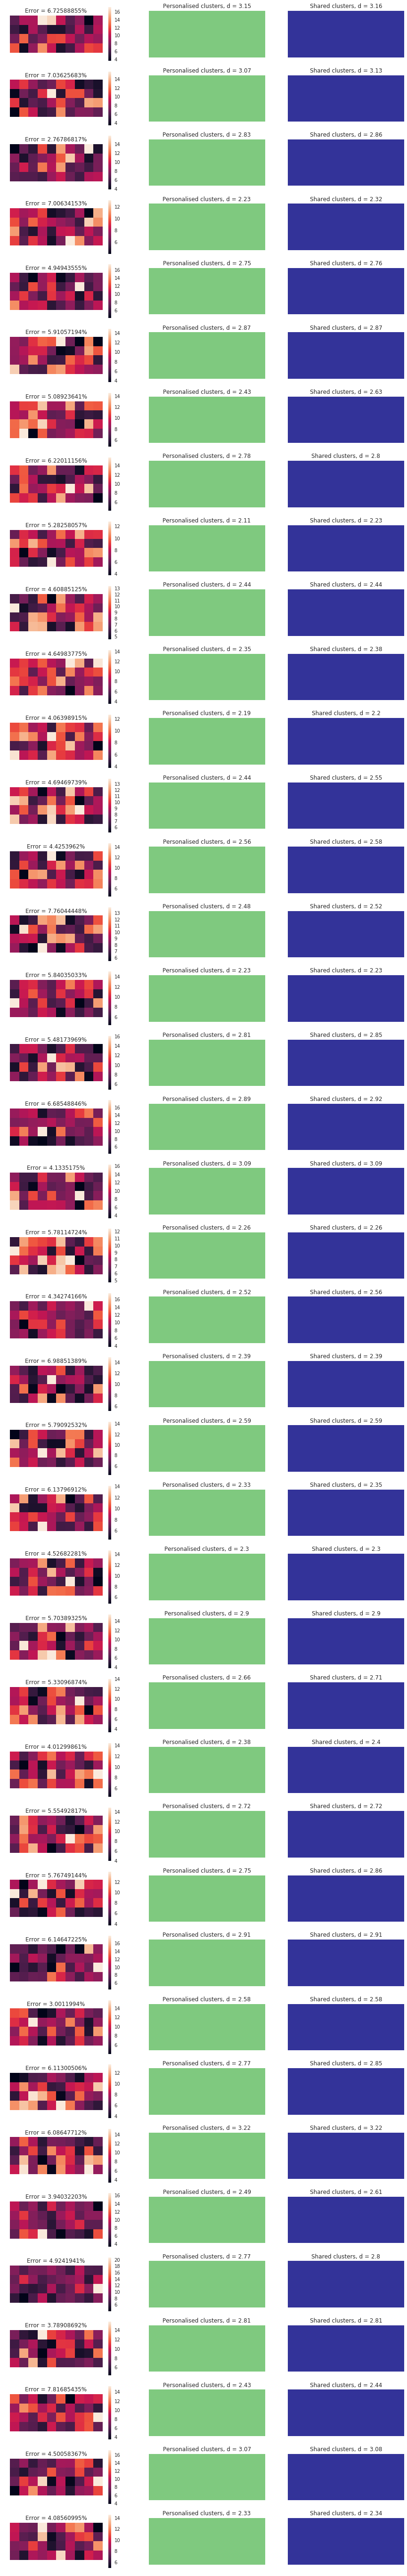

Shared clusters E/p =
 [[ 6.77807439]
 [11.13827932]]


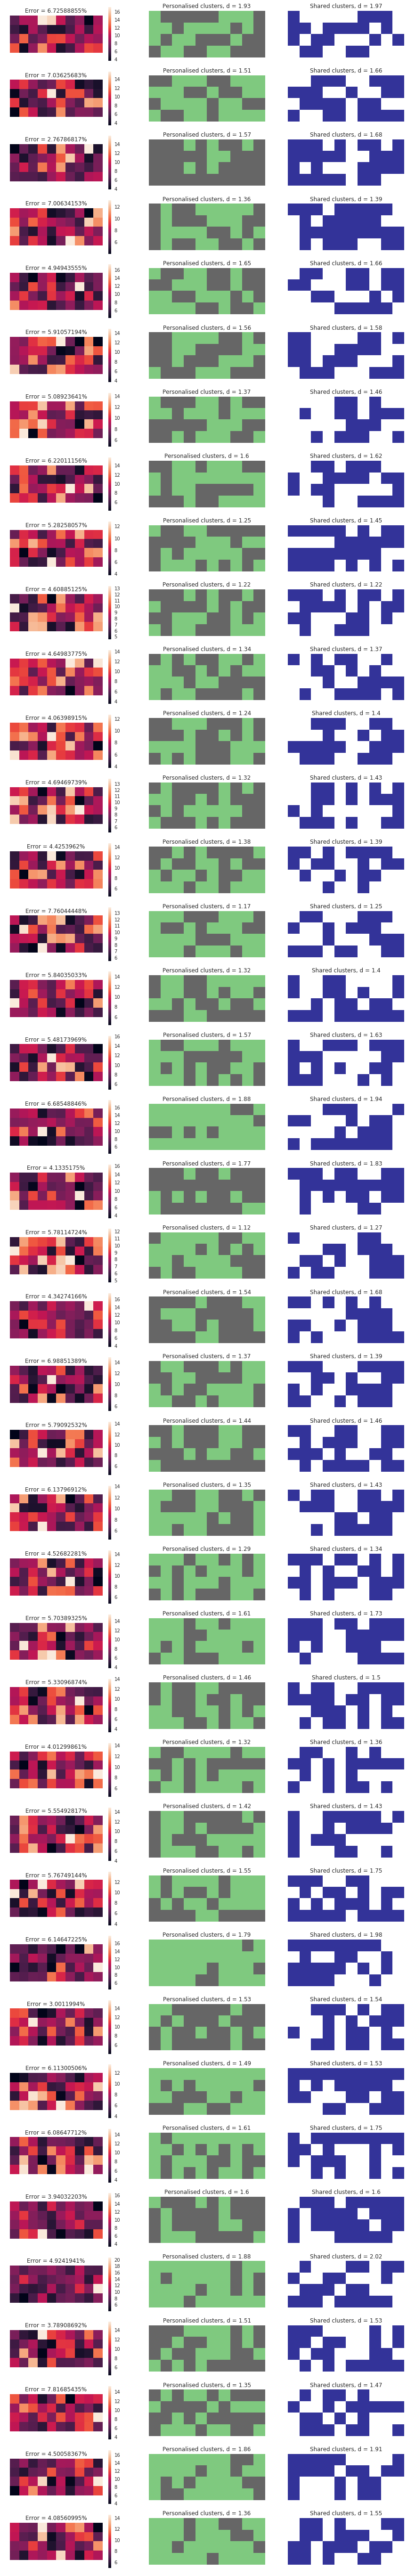

Shared clusters E/p =
 [[12.58788369]
 [ 5.96961897]
 [ 9.01933211]]


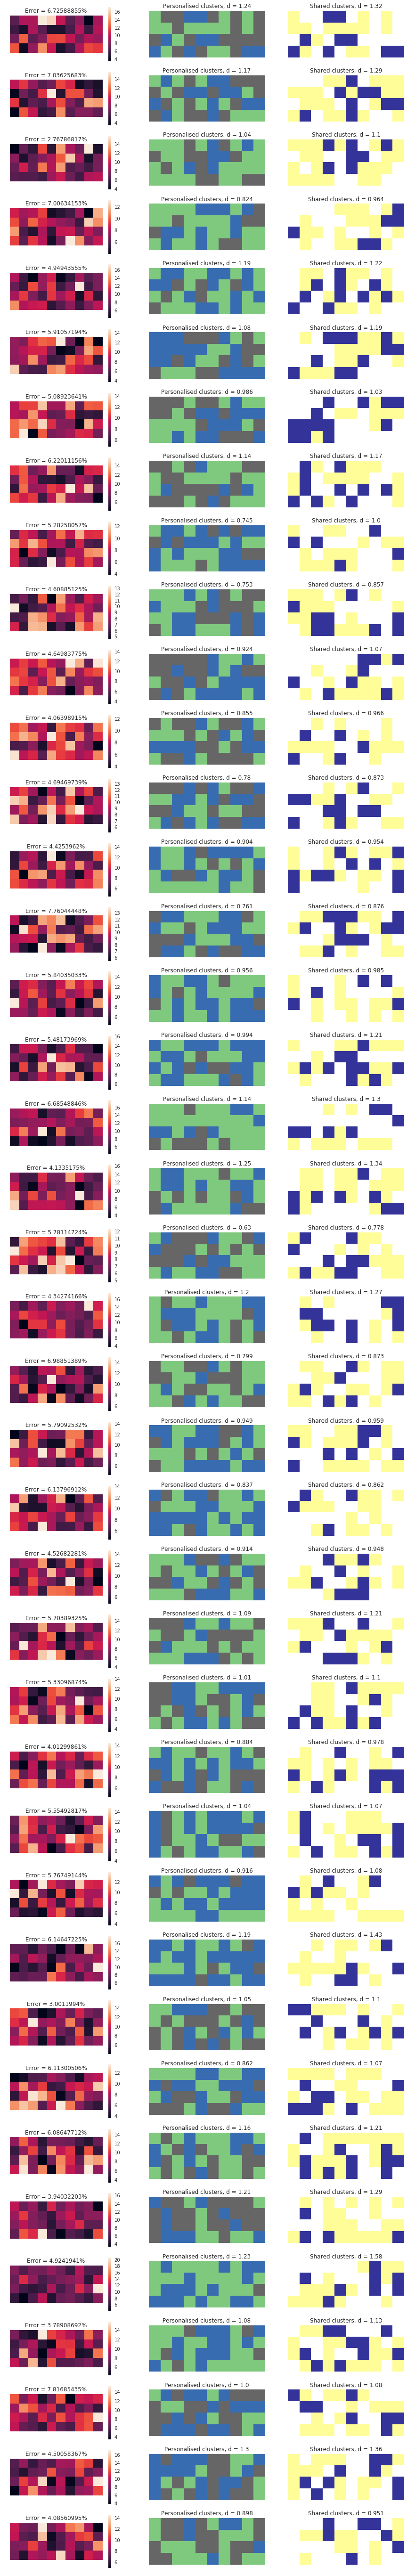

Shared clusters E/p =
 [[ 5.41798899]
 [10.22696138]
 [13.44319632]
 [ 7.81368561]]


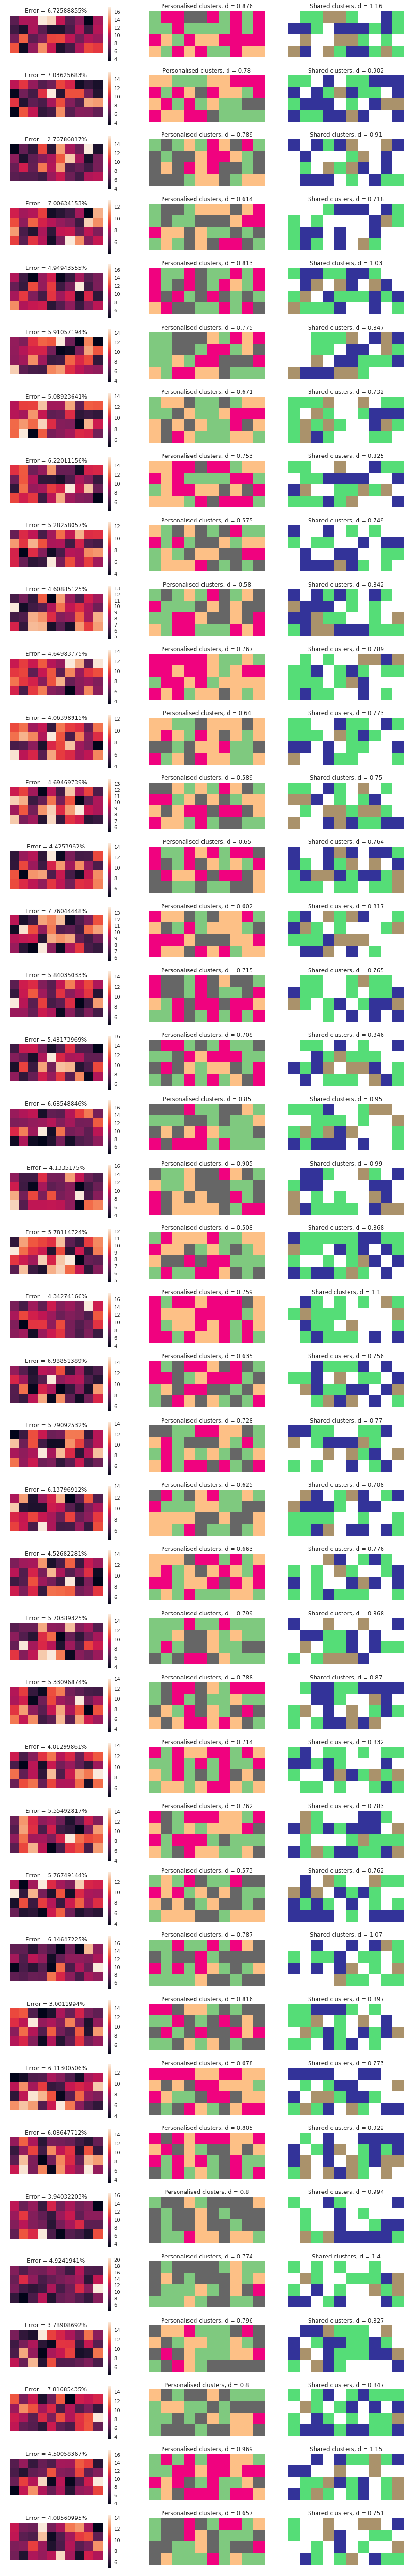

Shared clusters E/p =
 [[11.51731542]
 [ 9.25582385]
 [14.44063636]
 [ 5.13732727]
 [ 7.2457475 ]]


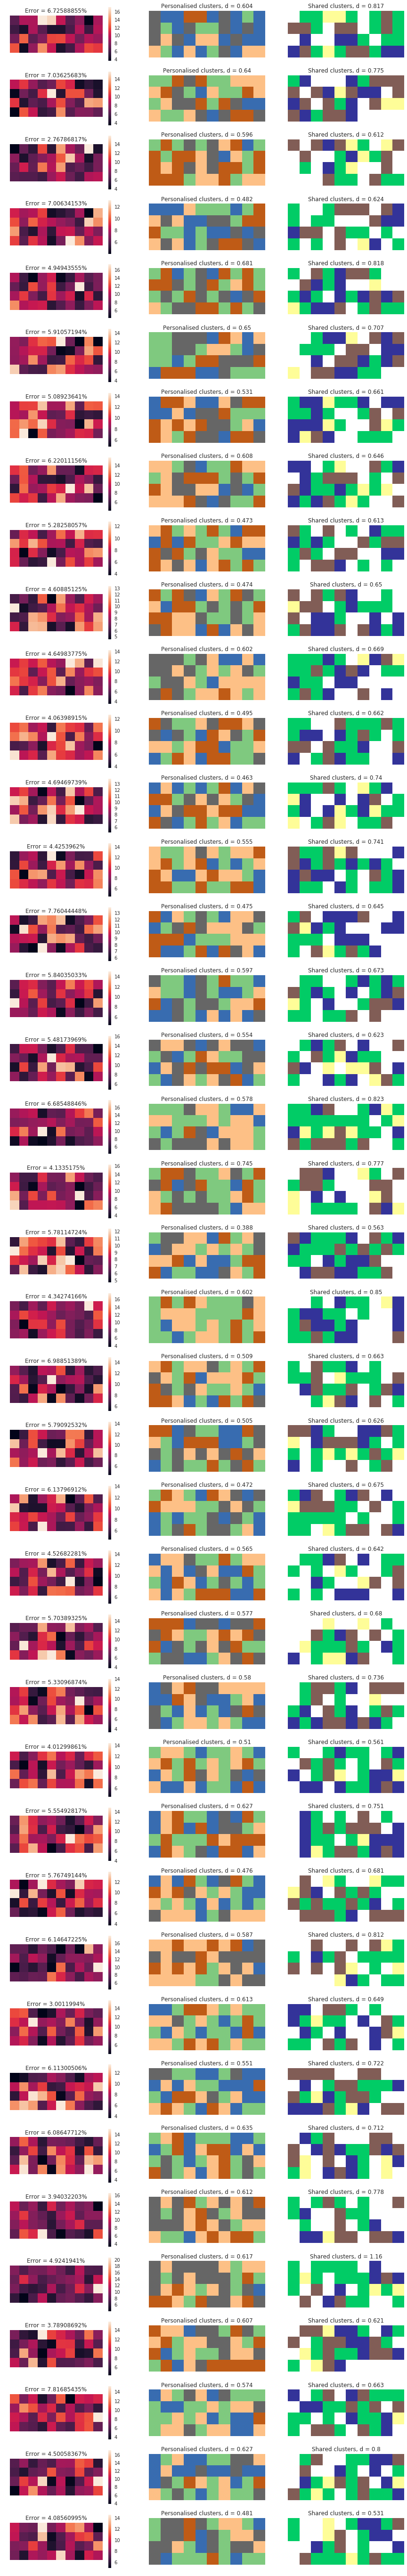

Shared clusters E/p =
 [[14.88126593]
 [ 8.36686145]
 [ 6.77437039]
 [12.0379754 ]
 [ 4.94688691]
 [ 9.98071704]]


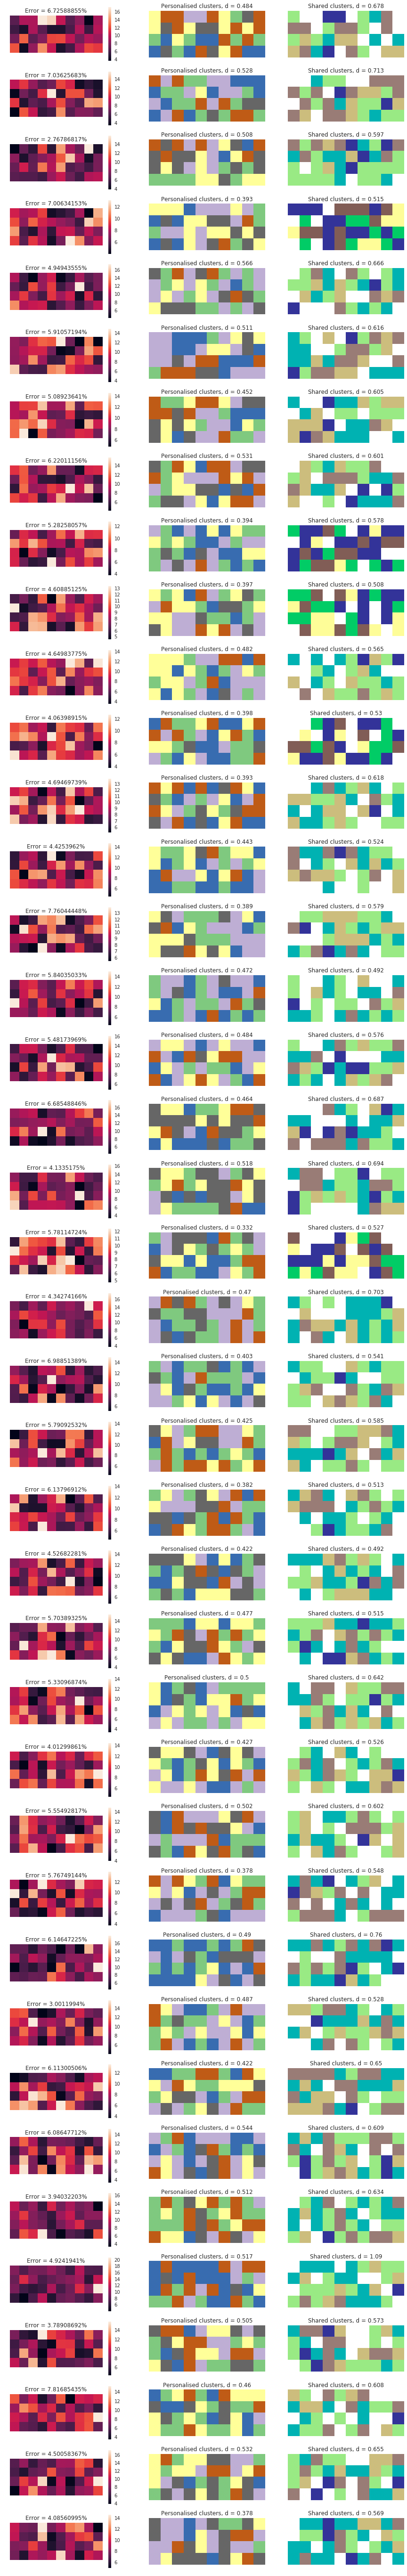

Shared clusters E/p =
 [[ 7.47306056]
 [10.48537544]
 [ 4.55582816]
 [14.98019364]
 [ 6.05798392]
 [ 8.97155867]
 [12.2718114 ]]


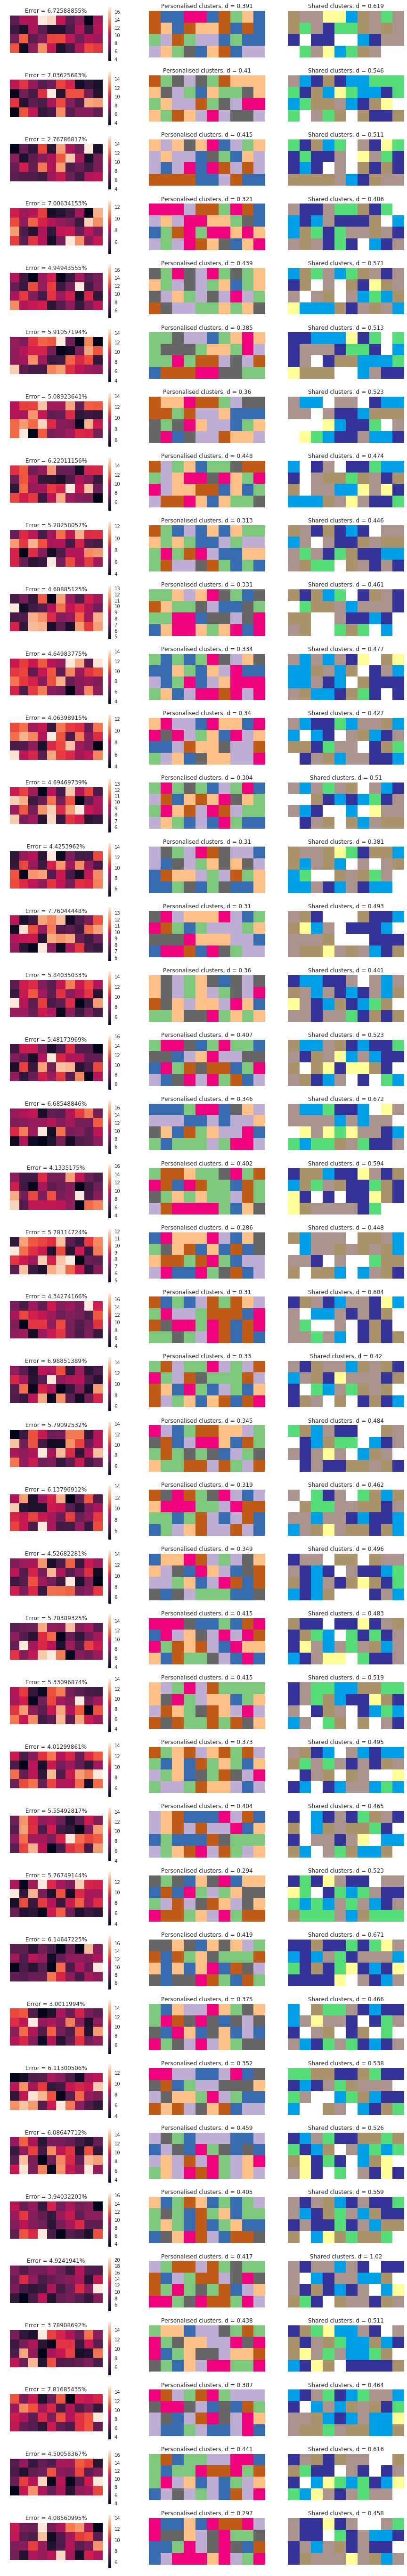

Shared clusters E/p =
 [[ 7.47924776]
 [10.31944046]
 [ 4.56523328]
 [13.77736494]
 [ 6.07213339]
 [ 8.93455356]
 [11.89782441]
 [16.49733839]]


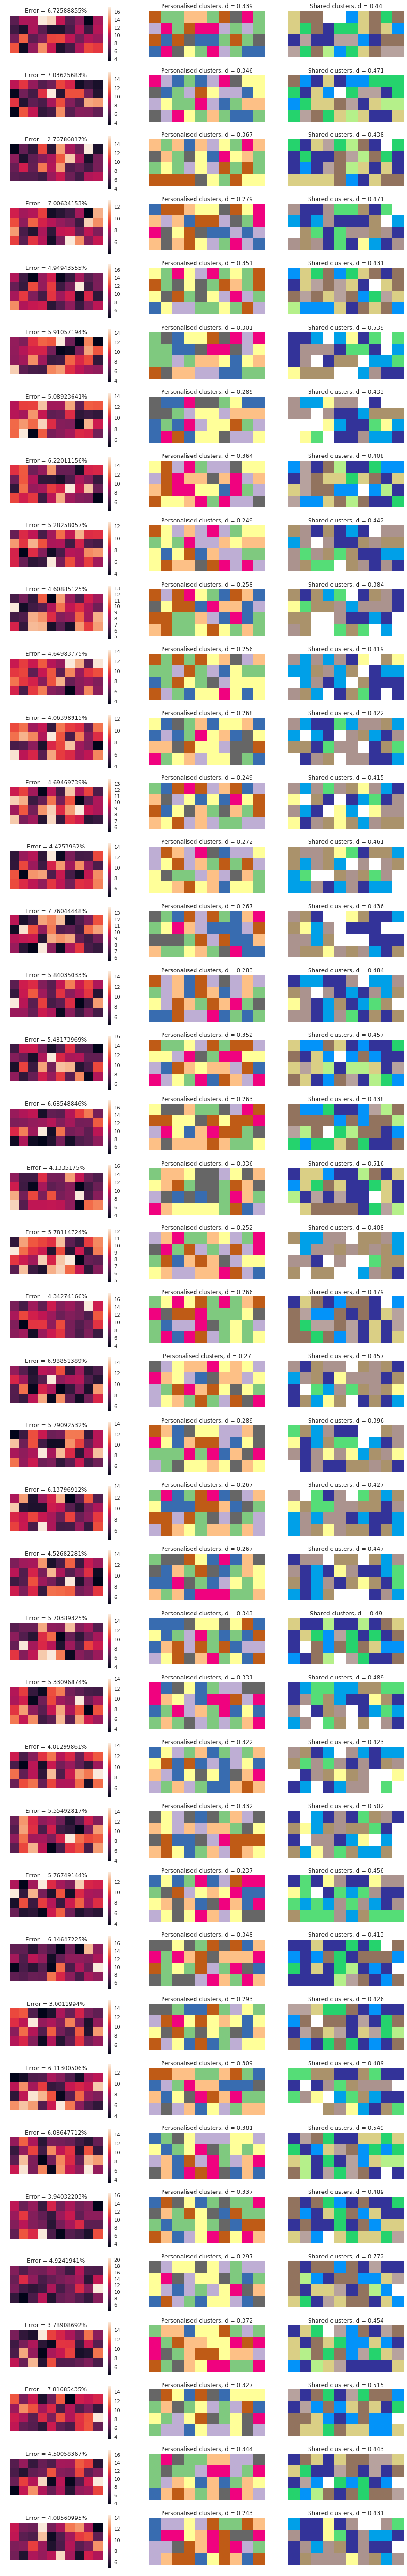

Shared clusters E/p =
 [[13.77736494]
 [ 8.07906698]
 [ 5.76350458]
 [10.46230103]
 [ 4.4024971 ]
 [11.93622606]
 [16.49733839]
 [ 9.22523801]
 [ 6.96225901]]


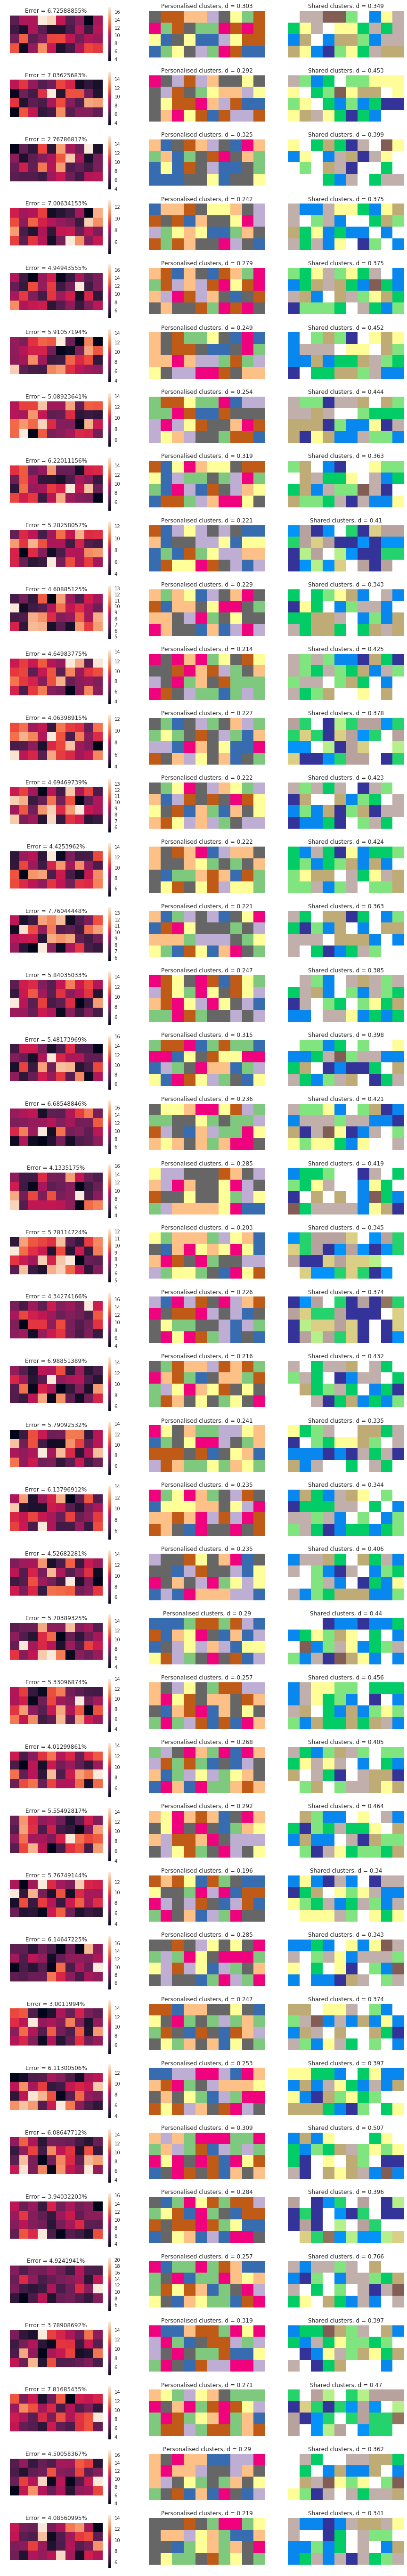

Shared clusters E/p =
 [[ 9.05019009]
 [ 5.6038601 ]
 [14.19379447]
 [11.34597607]
 [16.74832096]
 [ 6.81884328]
 [12.60014129]
 [ 4.27755019]
 [10.16551906]
 [ 7.91559762]]


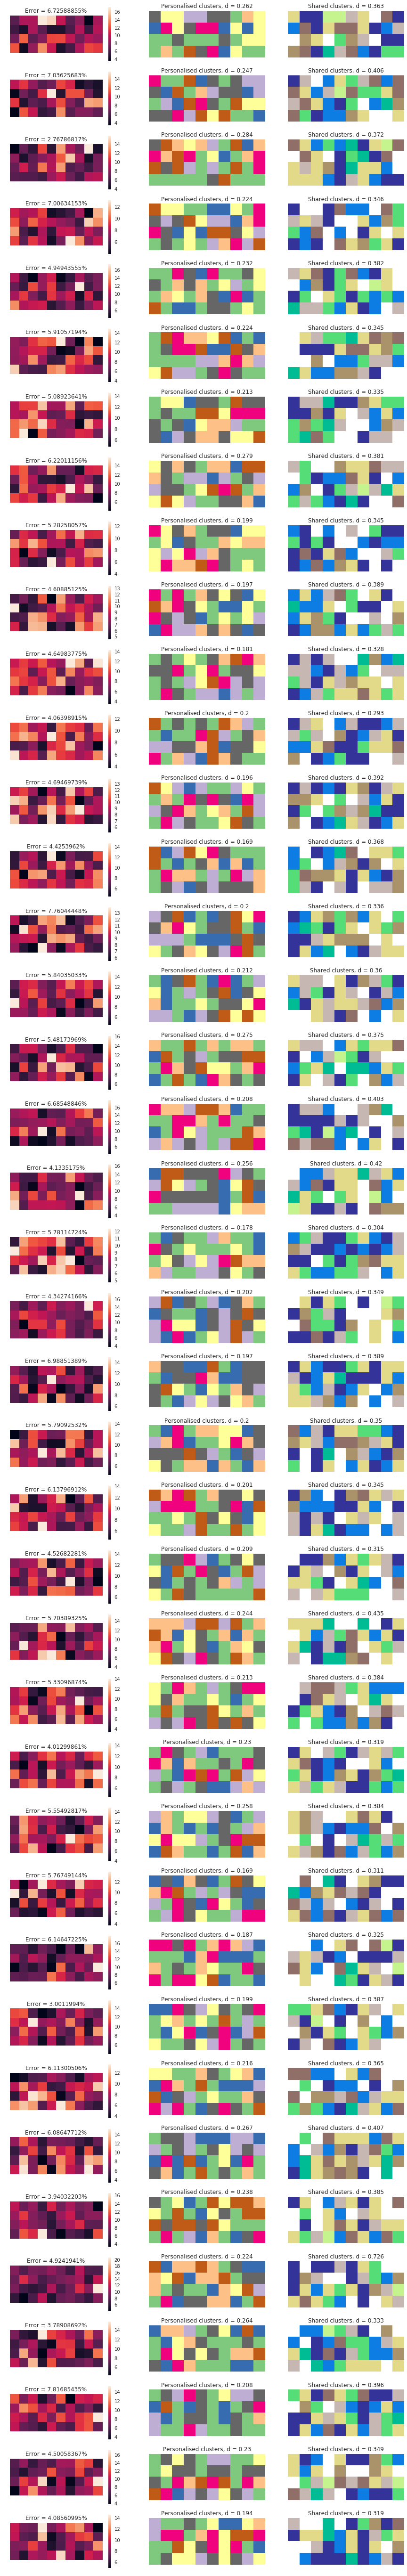

Shared clusters E/p =
 [[ 8.12309612]
 [12.64606616]
 [ 4.05499367]
 [ 9.15825704]
 [ 6.19764119]
 [14.23628329]
 [10.21360738]
 [11.37887051]
 [ 5.20491182]
 [16.74832096]
 [ 7.16203473]]


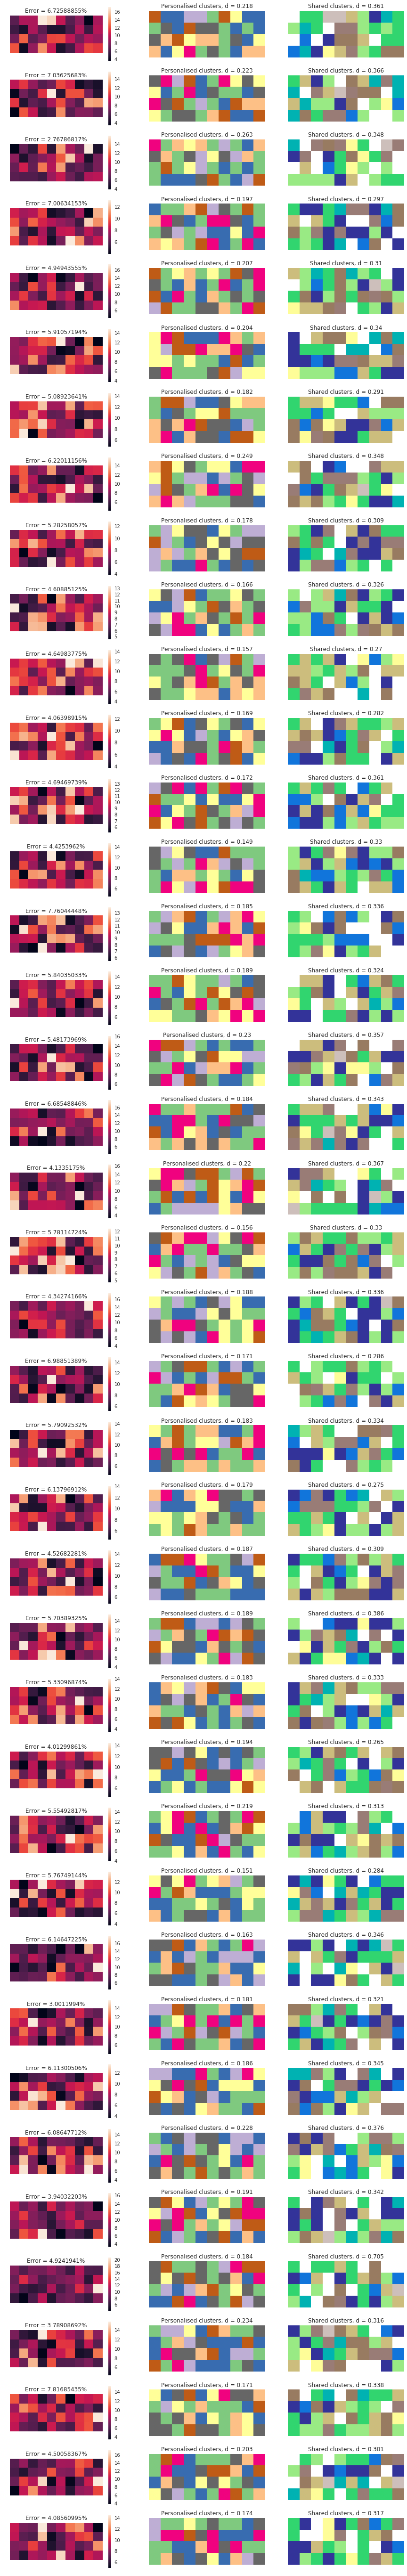

Shared clusters E/p =
 [[10.34385213]
 [ 6.94028111]
 [12.66984969]
 [ 3.97616903]
 [ 8.58993184]
 [16.74832096]
 [ 6.01679432]
 [11.44397757]
 [14.23628329]
 [ 7.78188651]
 [ 9.38220394]
 [ 5.06412948]]


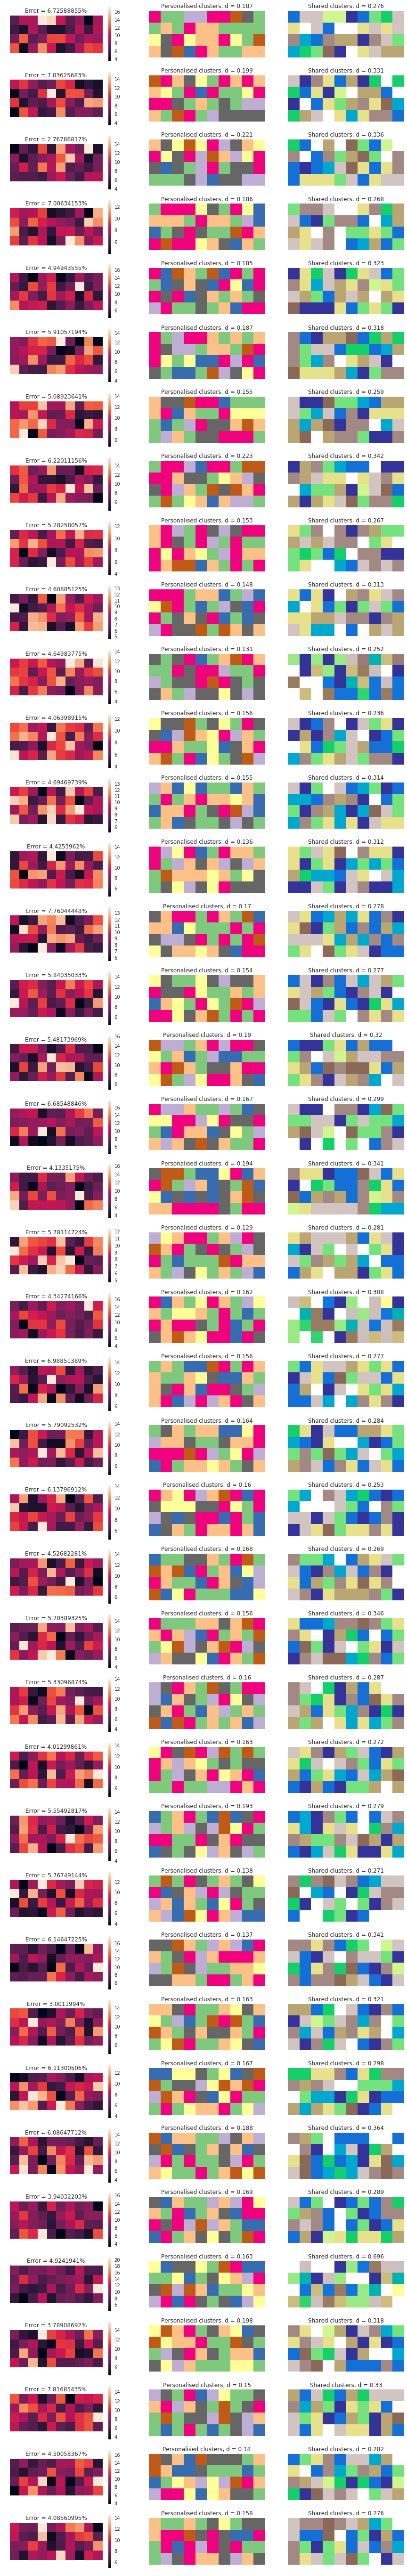

Shared clusters E/p =
 [[ 7.07877098]
 [10.34580077]
 [13.61016405]
 [ 5.20153801]
 [17.40458212]
 [ 8.64705144]
 [12.37691993]
 [ 6.1794217 ]
 [ 4.05499367]
 [15.11513208]
 [ 9.42246805]
 [ 7.86056229]
 [11.35996453]]


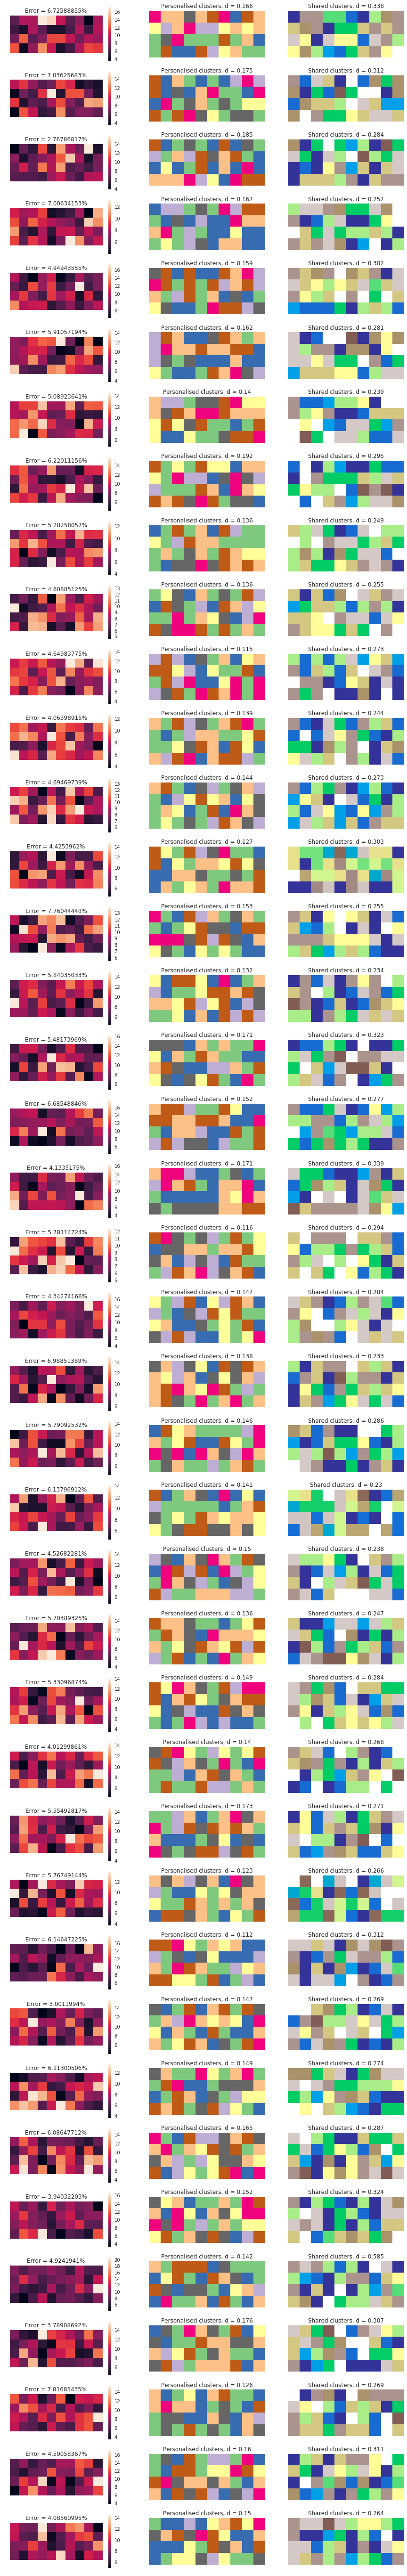

Shared clusters E/p =
 [[ 6.39511801]
 [12.38476758]
 [ 9.38553736]
 [ 4.92761619]
 [15.17080469]
 [ 8.61515105]
 [11.32826214]
 [ 5.69356074]
 [10.30453242]
 [ 7.8580977 ]
 [ 3.94262709]
 [17.40458212]
 [13.65474627]
 [ 7.11818417]]


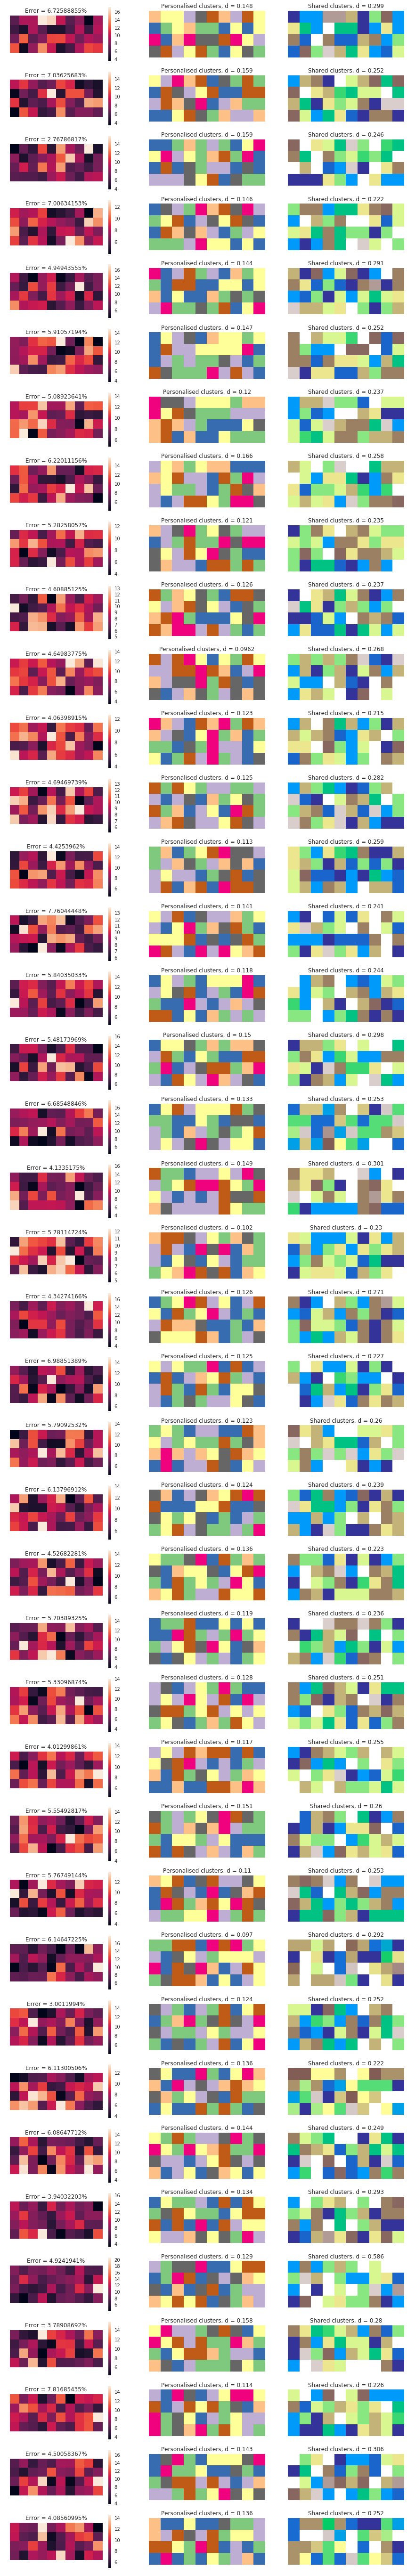

Shared clusters E/p =
 [[13.64016557]
 [ 5.66254848]
 [ 9.28351177]
 [ 7.84492354]
 [11.53192799]
 [ 3.87276808]
 [17.40458212]
 [ 6.38995745]
 [10.71091311]
 [15.11513208]
 [ 4.85689656]
 [ 8.57692899]
 [10.00589993]
 [ 7.1160721 ]
 [12.46311637]]


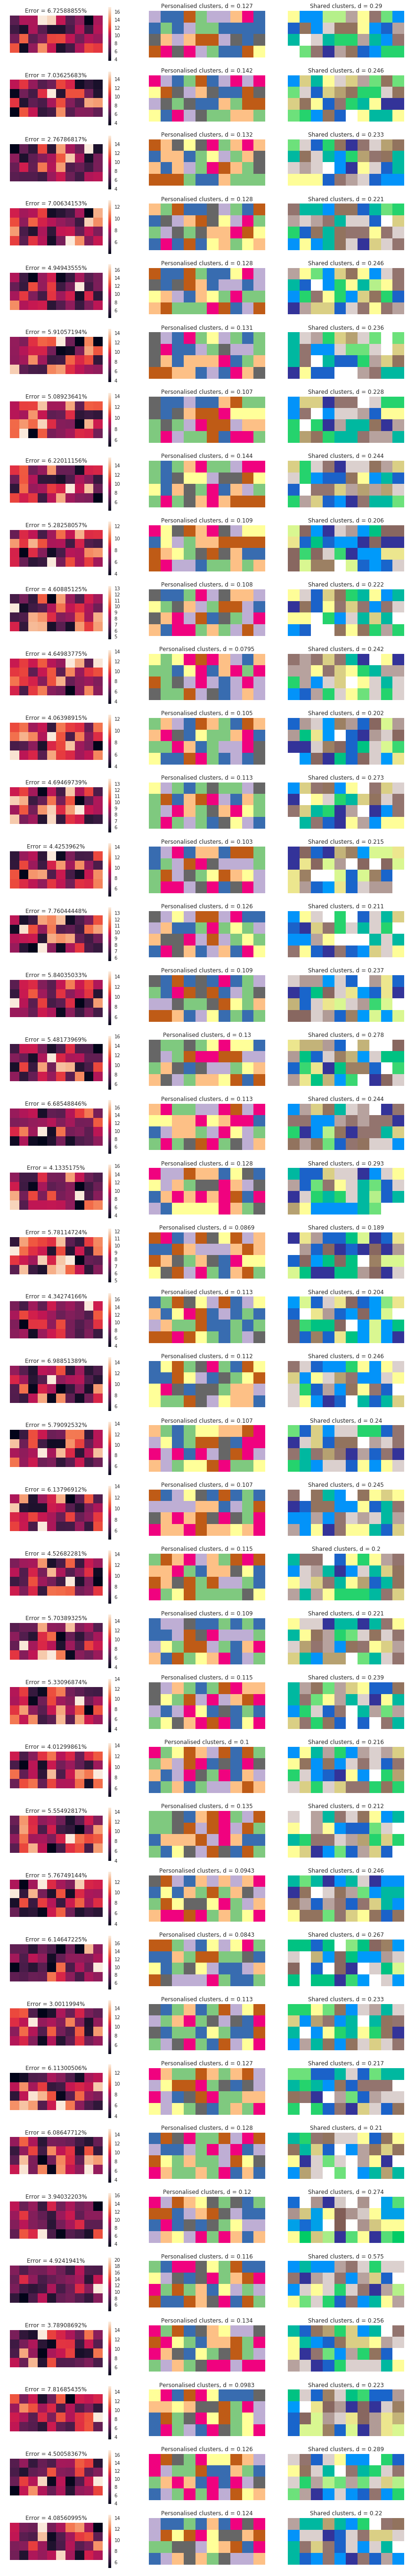

In [572]:
from sklearn.cluster import KMeans

dis_ind = []
dis_full = []

for k in range(1, 16):

    kmeans = KMeans(n_clusters=k)

    kmeans_full = KMeans(n_clusters=k)  
    s_full_array = np.array(sols_Ep).reshape(-1, 1)
    kmeans_full.fit(s_full_array) 

    print("Shared clusters E/p =\n", kmeans_full.cluster_centers_)

    fig = plt.figure(figsize=(15, 100))

    
    avg_dis_tot = 0
    avg_dis_full_tot = 0
    for n, s in enumerate(sols_Ep):

        fig.add_subplot(40, 3, n*3+1)
        plt.imshow([s[x:40:4] for x in range(4)])
        plt.title("Error = {}%".format(data["error"][n]))
        plt.axis("off")
        plt.colorbar()

        s_array = np.array(s).reshape(-1, 1)
        kmeans.fit_predict(s_array) 
        s_labels = kmeans.labels_
        avg_dis = np.sqrt(-kmeans.score(s_array)/40)
        avg_dis_tot = avg_dis_tot + avg_dis
    #     print(s_labels)
    #     print(kmeans.cluster_centers_)

        fig.add_subplot(40, 3, n*3+2)
        plt.imshow([s_labels[x:40:4] for x in range(4)], cmap="Accent")
        plt.title("Personalised clusters, d = {:.3}".format(avg_dis))
        plt.axis("off")

        s_full_labels = kmeans_full.predict(s_array)
        avg_dis = np.sqrt(-kmeans_full.score(s_array)/40)
        avg_dis_full_tot = avg_dis_full_tot + avg_dis

        fig.add_subplot(40, 3, n*3+3)
        plt.imshow([s_full_labels[x:40:4] for x in range(4)], cmap="terrain")
        plt.title("Shared clusters, d = {:.3}".format(avg_dis))
        plt.axis("off")

    plt.show()
    
    dis_ind.append(avg_dis_tot)
    dis_full.append(avg_dis_full_tot)

[]

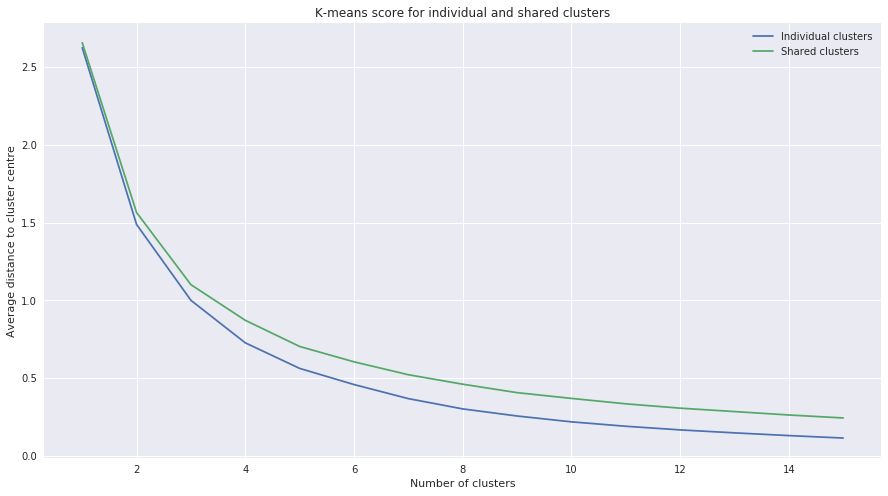

In [573]:
fig = plt.figure(figsize=(15, 8))
plt.plot(range(1, 16), [x/40 for x in dis_ind])
plt.plot(range(1, 16), [x/40 for x in dis_full])
plt.title("K-means score for individual and shared clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Average distance to cluster centre")
plt.legend(["Individual clusters", "Shared clusters"])
plt.plot()